<a href="https://colab.research.google.com/github/Zdzich71/Army/blob/main/army.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive

# Montowanie Google Drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/raw/'

Mounted at /content/drive


In [ ]:
def process_data(data, ppm = False):
    # Wybierz tytuł wskaźnika
    title = data.loc[1, 'Indicator Name']

    # Usuń niepotrzebne kolumny
    data.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 67'], axis=1, inplace=True)

    # Przekształć dane
    data = pd.melt(data, id_vars=['Country Code', 'Country Name'], var_name='Year', value_name=title).copy()

    # Zmień typ danych kolumny "Year" na int
    data['Year'] = data['Year'].astype(int)

    # Jeśli ppm=True, podziel wartość przez 1 000 000 i dodaj sufix "(mln)"
    if ppm:
        data[title] = data[title] / 1000000
        data.rename(columns={title: f'{title} (mln)'}, inplace=True)

    # Ustaw indeks
    data.set_index(['Year', 'Country Code', 'Country Name'], inplace=True)

    return data

In [ ]:
def plot_country_data(df, countries = None,years = None, plot = 'line'):
    plt.figure(figsize=(24, 16))

    for i in range(4):
        plt.subplot(2, 2, i + 1)

        # Jeśli rysujemy wykres słupkowy, oblicz szerokość dla każdego słupka
        if plot == 'bar':
            num_countries = len(countries or df.index.get_level_values('Country Name').unique())
            bar_width = 0.8 / num_countries  # Dostosuj szerokość słupka

            if years:
                bar_positions = np.arange(len(years))  # Pozycje słupków
            else:
                bar_positions = np.arange(len(df.index.get_level_values('Year').unique()))  # Wszystkie dostępne lata

        for idx, country in enumerate(countries or df.index.get_level_values('Country Name').unique()):
            if years:
                country_data = df[(df.index.get_level_values('Country Name') == country) & (df.index.get_level_values('Year').isin(years))]
            else:
                country_data = df[df.index.get_level_values('Country Name') == country]

            if plot == 'bar':
                # Oblicz przesunięcie słupka
                offset = idx * bar_width - (num_countries - 1) * bar_width / 2
                # Narysuj słupki z przesunięciem
                plt.bar(bar_positions + offset, country_data.iloc[:, i], width=bar_width, label=country)
            elif plot == 'scatter':
                sns.regplot(x=country_data.index.get_level_values('Year'), y=country_data.iloc[:, i], label=country)
            else:
                plt.plot(country_data.index.get_level_values('Year'), country_data.iloc[:, i], label=country)

        plt.title(df.columns[i])
        plt.xlabel('Year')
        plt.ylabel(df.columns[i])
        plt.legend()

        # Obróć etykiety osi X
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
# Pobierz dane
arms_personel = pd.read_csv(path+'API_MS.MIL.TOTL.P1_DS2_en_csv_v2_5735781/API_MS.MIL.TOTL.P1_DS2_en_csv_v2_5735781.csv',
                            skiprows=3)
arms_expenditure = pd.read_csv(path+'API_MS.MIL.XPND.ZS_DS2_en_csv_v2_5731503/API_MS.MIL.XPND.ZS_DS2_en_csv_v2_5731503.csv',
                            skiprows=3)
arms_import = pd.read_csv(path+'API_MS.MIL.MPRT.KD_DS2_en_csv_v2_5735782/API_MS.MIL.MPRT.KD_DS2_en_csv_v2_5735782.csv',
                            skiprows=3)
arms_export = pd.read_csv(path+'API_MS.MIL.XPRT.KD_DS2_en_csv_v2_5728963/API_MS.MIL.XPRT.KD_DS2_en_csv_v2_5728963.csv',
                            skiprows=3)

In [ ]:
# Przetwarzaj dane
arms_personel = process_data(arms_personel, ppm = True)
arms_expenditure = process_data(arms_expenditure)
arms_import = process_data(arms_import, ppm = True)
arms_export = process_data(arms_export, ppm = True)

In [ ]:
# Połącz dane
df = arms_personel.merge(arms_expenditure, on=['Year', 'Country Code', 'Country Name'])
df = df.merge(arms_import, on=['Year', 'Country Code', 'Country Name'])
df = df.merge(arms_export, on=['Year', 'Country Code', 'Country Name'])

In [ ]:
print(f" dane od {df.index.get_level_values('Year').min()} do {df.index.get_level_values('Year').max()} ")

 dane od 1960 do 2022 


In [ ]:
df.index.get_level_values('Country Name').unique().sort_values().to_list()

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East

In [ ]:
group1 = ['Poland',
          'France',
          'Germany',
          'Sweden',
          'Bulgaria',
          ]

group2 = ['United States',
          'European Union',
          'Central Europe and the Baltics',
          'Euro area'
          ]

group3 = [
    'European Union',
    'Central Europe and the Baltics',
    'Germany',
    'Poland',
]

interesujace_kraje = group3

years_to_include = range(1960, 2024)  # Zakres lat prawostronnie otwarty



In [ ]:
df_filtered = df.loc[
    (df.index.get_level_values('Country Name').isin(interesujace_kraje)) &
    (df.index.get_level_values('Year').isin(years_to_include))
]
df_filtered

Armed forces personnel, total (mln)  \
Year Country Code Country Name                                                          
1960 CEB          Central Europe and the Baltics                                  NaN   
     DEU          Germany                                                         NaN   
     EUU          European Union                                                  NaN   
     POL          Poland                                                          NaN   
1961 CEB          Central Europe and the Baltics                                  NaN   
...                                                                               ...   
2021 POL          Poland                                                          NaN   
2022 CEB          Central Europe and the Baltics                                  NaN   
     DEU          Germany                                                         NaN   
     EUU          European Union                                                  NaN   
     POL          Poland                                                          NaN   

                                                  Military expenditure (% of general government expenditure)  \
Year Country Code Country Name                                                                                 
1960 CEB          Central Europe and the Baltics                                                NaN            
     DEU          Germany                                                                       NaN            
     EUU          European Union                                                                NaN            
     POL          Poland                                                                        NaN            
1961 CEB          Central Europe and the Baltics                                                NaN            
...                                                                                             ...            
2021 POL          Poland                                                                   4.626254            
2022 CEB          Central Europe and the Baltics                                                NaN            
     DEU          Germany                                                                       NaN            
     EUU          European Union                                                                NaN            
     POL          Poland                                                                        NaN            

                                                  Arms imports (SIPRI trend indicator values) (mln)  \
Year Country Code Country Name                                                                        
1960 CEB          Central Europe and the Baltics                                             2039.0   
     DEU          Germany                                                                    2054.0   
     EUU          European Union                                                             6373.0   
     POL          Poland                                                                      853.0   
1961 CEB          Central Europe and the Baltics                                             1974.0   
...                                                                                             ...   
2021 POL          Poland                                                                       74.0   
2022 CEB          Central Europe and the Baltics                                             1063.0   
     DEU          Germany                                                                     182.0   
     EUU          European Union                                                             3568.0   
     POL          Poland                                                                      639.0   

                                                  Arms exports (SIPRI trend indicator values) (

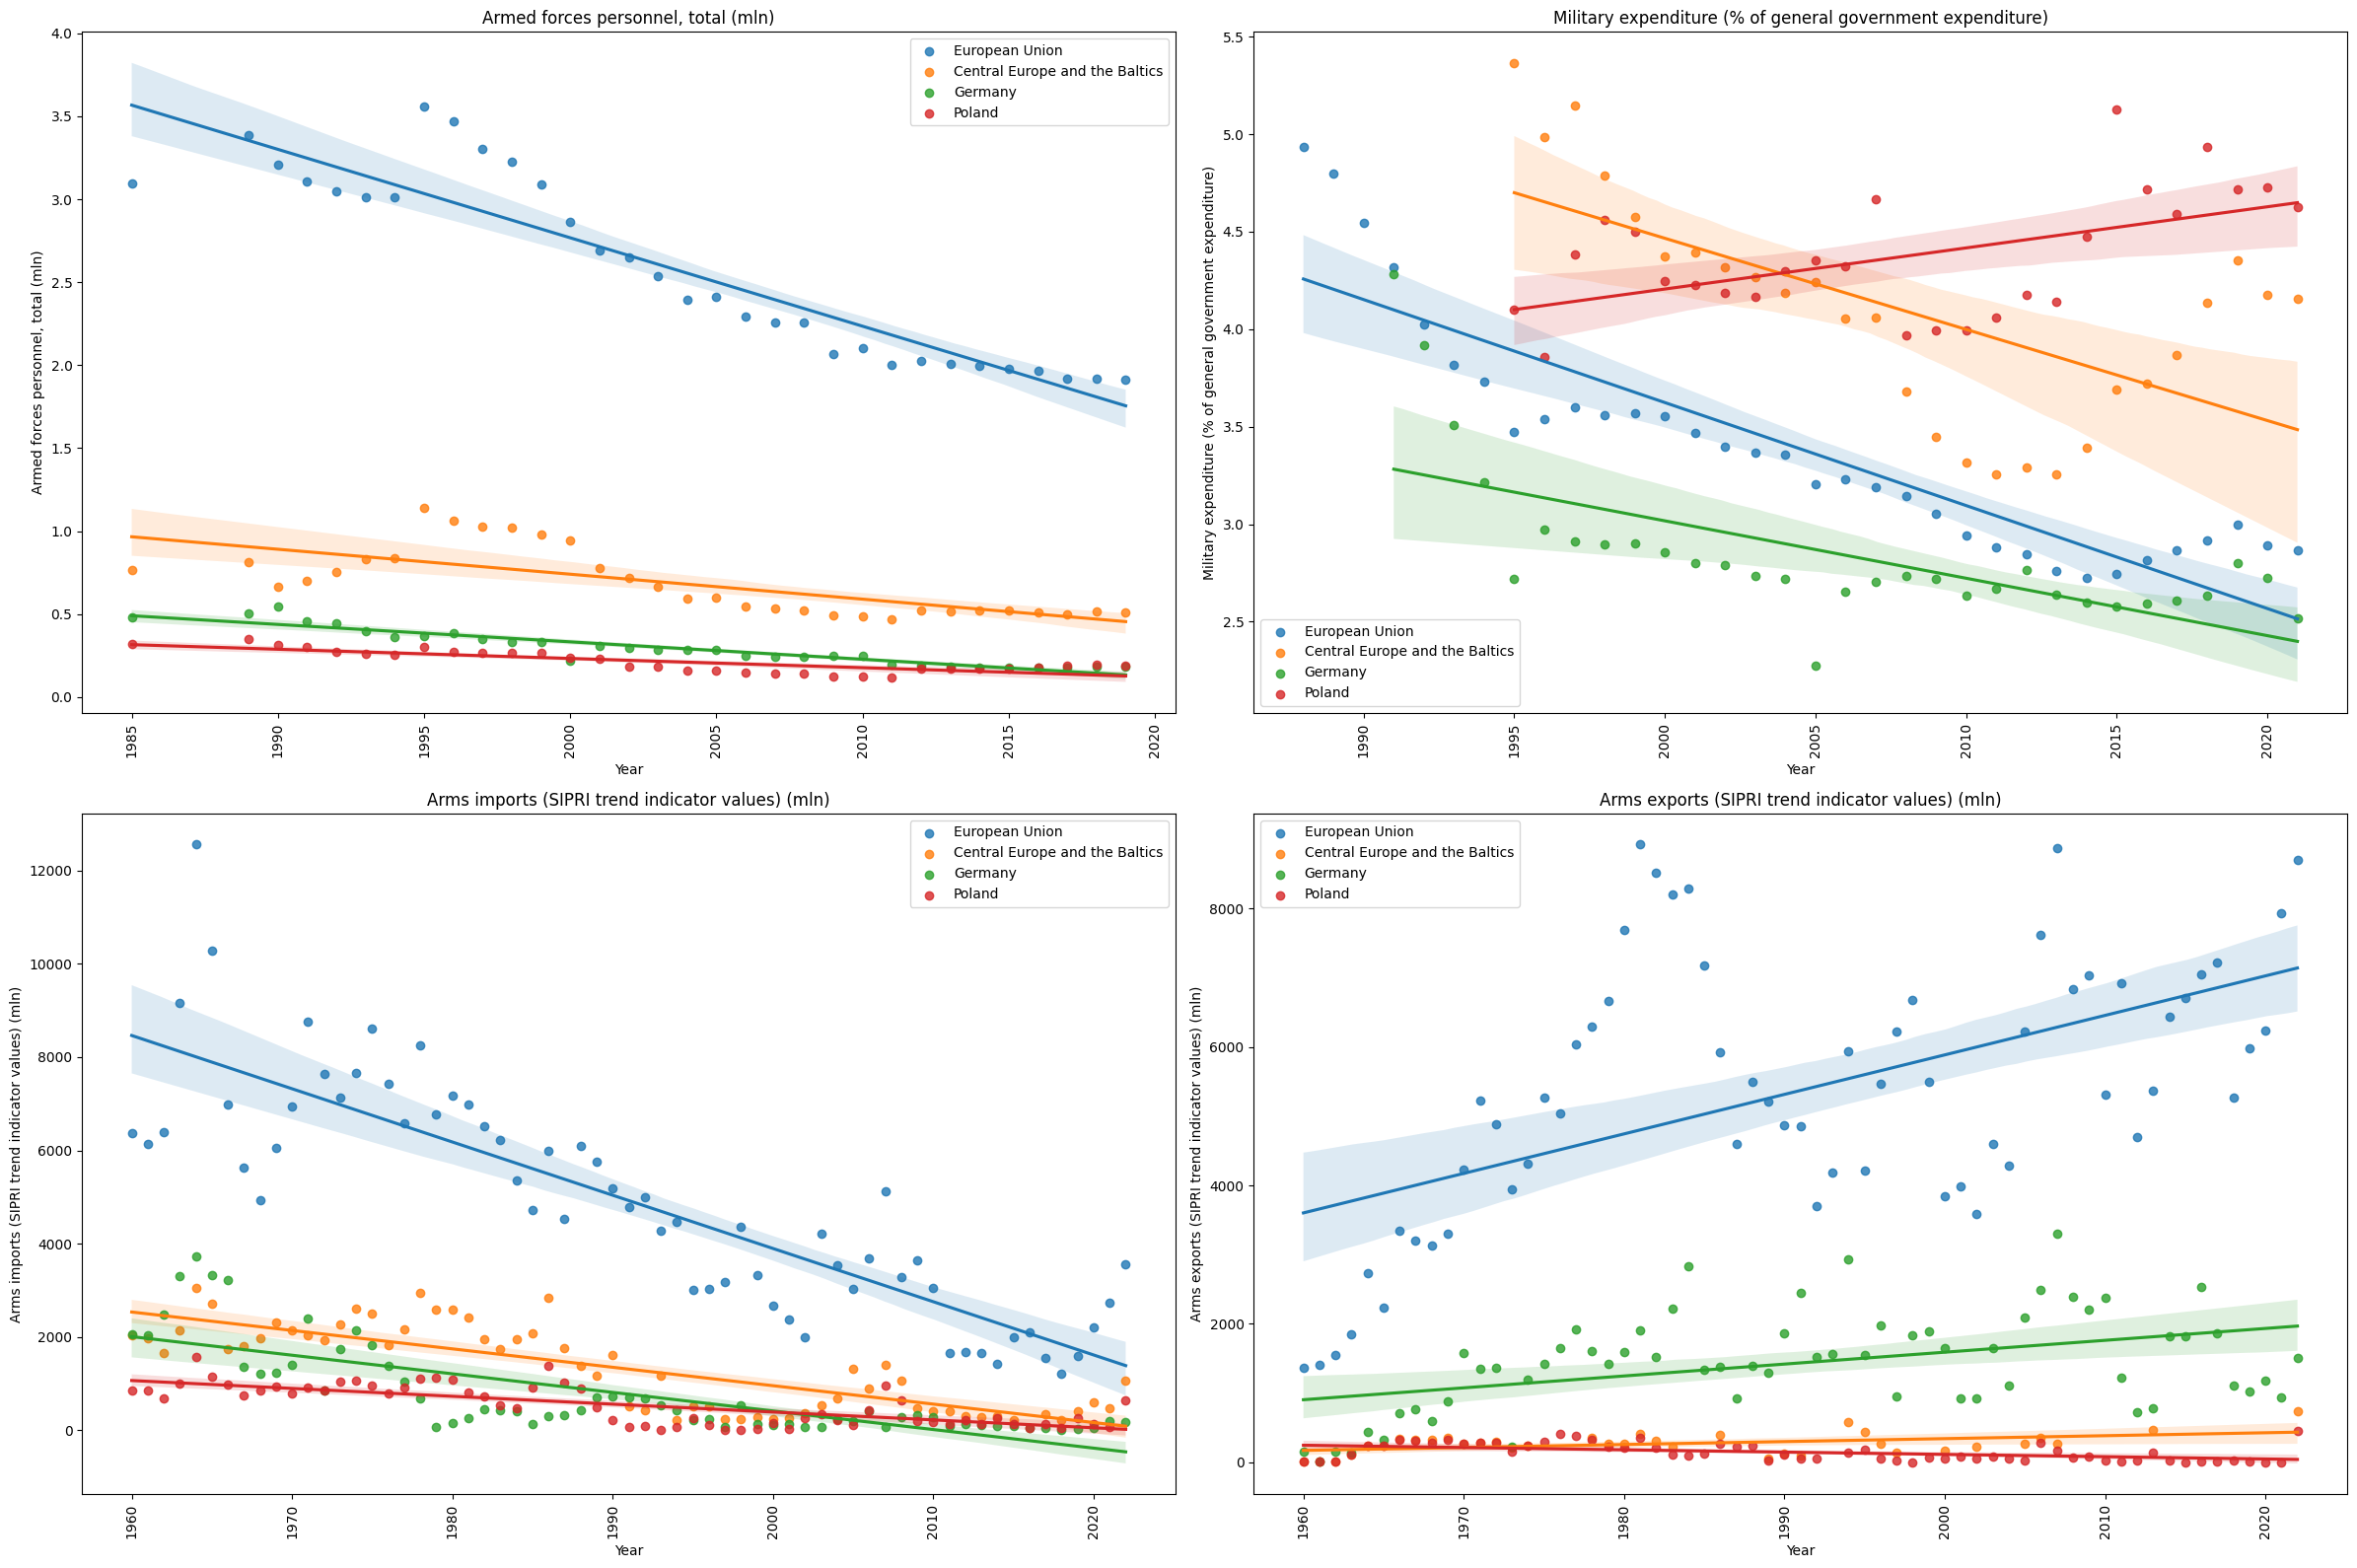

In [ ]:
plot_country_data(df = df,
                   countries = interesujace_kraje,
                   years = years_to_include,
                   plot='scatter' # oczekiwane wartości 'scatter' 'bar' 'line' domyślnie 'line'
                 )